In [18]:
#import all modules
%pylab nbagg
from matplotlib.pyplot import *
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
from scipy.integrate import odeint
from scipy.interpolate import interp1d

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['draw_if_interactive']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [19]:
#Introduce DEs: y1=theta and y2=angular velocity
#w0_2 is natural frequency and d is delta

def dy_dt(y, t, w02, d):
    y1, y2=y
    dydt=[y2, -w02*sin(y1)*(1-d*abs(sin(y1)))]
    return dydt

In [20]:
#Parameters:
g=9.8 #m/s^2
l=1.0 #m
w0_2=g/l

In [21]:
#Part a
#using initial conditions and data, the function would display the oscillation's period
def find_T(y0, d):
    #Solve ODE over time start and end points
    solution=odeint(dy_dt, y0, t, args=(w0_2,d))
    
    #Let theta = initial angle
    #Stop when the first equilibrium theta data is found
    theta=solution[0,0]
    k=0
    while theta>0.:
        k+=1
        theta=solution[k,0]
    k+=10
    
    #Get time as a function of the angle
    #Evaluate 1/4 of a period and return the full period
    f=interp1d(solution[0:k,0], t[0:k])
    T=4*f(0.)
    return T

In [22]:
d=0

#Linear approximation
T_approx=2*pi*sqrt(l/g)

#Introduce time and angle intervals
t=linspace(0,100, 10000)
theta_0=np.linspace(0,0.9*pi,250)

#Iterate and stop once value is within 1% of the period
for i in range(1,len(theta_0)+1):
    y0=[theta_0[len(theta_0)-i],0.]
    
    T=find_T(y0, d)
    error=abs(T-T_approx)/T_approx
    if error<0.01:
        print('Maximum angle for which T is within 1% of the linear approximation is ', theta_0[len(theta_0)-i], ' radians.')
        break;

Maximum angle for which T is within 1% of the linear approximation is  0.39743039593605817  radians.


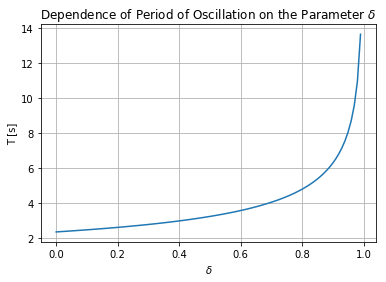

In [23]:
#Part b
#Let theta_0 be at pi/2
th_0=pi/2
y0=[th_0,0.0] #Initial conditions

#Only need delta to be less than 1 because of no oscillation and T approaches infinity
d=linspace(0,0.99,99)
T=zeros(len(d))

#Find period
for i in range(len(d)):
    T[i]=find_T(y0,d[i])


#Plot
figure(1)
plot(d,T)
title("Dependence of Period of Oscillation on the Parameter $\delta$")
xlabel("$\delta$")
ylabel("T [s]")
grid()
show()

In [24]:
#Part c
#From the plot, delta goes to zero as T goes to infinity. This happens due the force of gravity and Lorentz that are in equal magnitude but different directions (when delta = 1). Therefore, there is no oscillation produced by the pendulum; moreover, the pendulum stays in its initial position, theta_0.